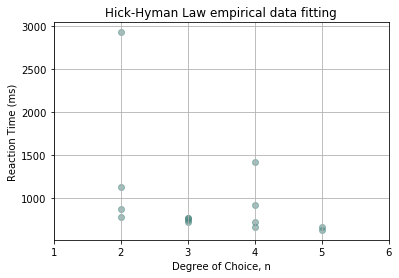

In [24]:
###############################################################################
# 2 Hick-Hyman Law
# ------------------------
# human performance principle depicting choice-reaction time
# First-time configuration:
#   From upper menu, gp to "Edit Keyboard Shortcuts" in "Help", delete Shortcuts
#   regarding 'A', 'E', 'R', 'G', 'H', 'U', 'I', 'L'
# GUI Usage:
#   1)  To yield ecologically valid result, please cover real-time data plotting
#       by GUI when performing hit-key experiment.
###############################################################################

import tkinter as tk
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
# import numpy as np
import random
import time as tm

class ExperimentAccurate(tk.Frame):
    # initial parameters
    gameAreaHeight = 300
    stimuliBasePosition = [200, 2]
    stimuliSideLength = 30
    stimuliFontSize = 20
    stimuliKey = ['A', 'E', 'R', 'G', 'H', 'U', 'I', 'L']
    stimuliTotalAmount = 8
    timeStart = []                                  # list of timestamp when generating each stimulus
    timeHit = []                                    # list of timestamp when hit each correct key
    timeDelta = []                                  # list of reaction time in millisecond
    plotXList = []                                  # list of stimuli amount as abscissa in plot
    counterMax = 5                                  # to limit repeating times of hit-key experiment for a certain stimuli set size
    flagPause = False
    def __init__(self, parent=None):
        tk.Frame.__init__(self, parent)
        self.pack()
        self.makeWidgets()                          # GUI layout
        self.defineStimuliCollection()
        self.stimuliAmount = 2                      # to increase the size of stimuli set
        self.generateStimuliSet(self.stimuliAmount) # generate required size of stimuli set
        self.counter = 0                            # to record repeating times of hit-key experiment so far
        self.generateRandomStimuli(self.indexList)  # generate 1 associated random stimulus
        self.bind_all('<KeyPress>', self.onKeyHit)  # check user hit-key reaction
        # self.flagPause = False
        self.bind_all('<space>', self.pauseContinue)    # press <space> to pause or continue key-hit experiment
    def makeWidgets(self):
        self.frameExplain = tk.Frame(self)
        self.frameGameArea = tk.Canvas(self, bd=2, bg='white', relief=tk.GROOVE, width=500, height=ExperimentAccurate.gameAreaHeight)
        self.frameBonus = tk.Frame(self)
        self.frameExplain.grid(row=0, column=0, padx=10, pady=10)
        self.frameGameArea.grid(row=1, column=0, padx=10, pady=10)
        self.frameGameArea.grid_propagate(0)
        self.frameBonus.grid(row=0, column=1, padx=10, pady=10)
        # buttonHelp = tk.Button(frameExplain, text="Usage Help", command=onHelpClicked)
        # buttonStart = tk.Button(frameExplain, text="Next", command=onNextClicked)
        self.labelPause = tk.Label(self.frameExplain, text="Press <space> key to pause at any time")
        self.displayStimuliSet = tk.StringVar()
        self.labelStimuliSet = tk.Label(self.frameExplain, textvariable=self.displayStimuliSet)
        self.labelRequirement = tk.Label(self.frameBonus, text="Please to be as accurate as possible")
        self.labelFeedback = tk.Label(self.frameBonus, text="chronoscope or hitting points here", bd=2, relief=tk.RAISED)
        # buttonHelp.grid(row=0, column=0, ipadx=10, ipady=10, padx=10, sticky=tk.W)
        # buttonStart.grid(row=0, column=1, ipadx=10, ipady=10, padx=10, sticky=tk.W)
        self.labelPause.grid(row=0, column=2, padx=10, sticky=tk.W)
        self.labelStimuliSet.grid(row=1, column=2, padx=10, sticky=tk.W)
        self.labelRequirement.grid(row=0, column=0, padx=10, pady=10)
        self.labelFeedback.grid(row=1, column=0, ipadx=10, ipady=10, padx=10, pady=10)
    def defineStimuliCollection(self):
        self.stimuli = [0 for x in range(8)]
        self.stimuliText = [0 for x in range(8)]
        for x in range(8):
            self.stimuli[x] = self.frameGameArea.create_rectangle(self.stimuliBasePosition[0], self.stimuliBasePosition[1], self.stimuliBasePosition[0] + self.stimuliSideLength, self.stimuliBasePosition[1] + self.stimuliSideLength, fill='#C0FFF8', activefill='#63B2A9', tags=self.stimuliKey[x], state=tk.HIDDEN)
            self.stimuliText[x] = self.frameGameArea.create_text(self.stimuliBasePosition[0] + 0.5*self.stimuliSideLength, self.stimuliBasePosition[1] + 0.5*self.stimuliSideLength, text=self.stimuliKey[x], font=self.stimuliFontSize, tags=self.stimuliKey[x], state=tk.HIDDEN)
    def generateStimuliSet(self, argAmount):
        self.indexList = []
        self.stringStimuliSet = ""
        for i in range(argAmount):
            self.indexList.append(i)
            # visualize current stimuli set
            self.stringStimuliSet += self.stimuliKey[i]
        self.displayStimuliSet.set(self.stringStimuliSet)
        # calculate speed from stimuli amount
        # self.speed =
    def generateRandomStimuli(self, argIndexList):
        # indexCurrent is a list
        self.indexCurrent = random.sample(argIndexList, 1)
        self.frameGameArea.itemconfigure(self.stimuli[self.indexCurrent[0]], state=tk.NORMAL)
        self.frameGameArea.itemconfigure(self.stimuliText[self.indexCurrent[0]], state=tk.NORMAL)
        self.frameGameArea.coords(self.stimuli[self.indexCurrent[0]], self.stimuliBasePosition[0], self.stimuliBasePosition[1], self.stimuliBasePosition[0] + self.stimuliSideLength, self.stimuliBasePosition[1] + self.stimuliSideLength)
        self.frameGameArea.coords(self.stimuliText[self.indexCurrent[0]], self.stimuliBasePosition[0] + 0.5*self.stimuliSideLength, self.stimuliBasePosition[1] + 0.5*self.stimuliSideLength)
        # print (self.indexCurrent)
        # record timestamp when generating ths stimuli
        self.timeStart.append(tm.clock())
        # print (self.timeStart)
        self.animateStimuli()
    # move stimuli downwards
    def animateStimuli(self):
        # press <space> can pause/continue animateStimuli function
        if self.flagPause == False:
            self.frameGameArea.move(self.stimuli[self.indexCurrent[0]], 0, 0.5)
            self.frameGameArea.move(self.stimuliText[self.indexCurrent[0]], 0, 0.5)
            self.frameGameArea.after(20, self.animateStimuli)
    def onKeyHit(self, event):
        # press <space> can pause/continue onKeyHit function
        if self.flagPause == False:
            # check if the user hit the correct key
            self.indexHit = []
            if event.char == self.stimuliKey[self.indexCurrent[0]] or event.char == self.stimuliKey[self.indexCurrent[0]].lower():
                self.indexHit.append(self.indexCurrent[0])
                self.frameGameArea.itemconfigure(self.stimuliKey[self.indexCurrent[0]], state=tk.HIDDEN)
                self.timeHit.append(tm.clock())
                self.timeDelta.append((self.timeHit[-1]-self.timeStart[-1])*1000)
                self.plotXList.append(self.stimuliAmount)
                # repeat hit-key experiment for this size of stimuli set
                if self.counter < self.counterMax - 1:
                    self.generateRandomStimuli(self.indexList)
                    self.counter += 1
                    # plot Reaction Time against the amount of stimuli (i.e. size of stimuli set)
                    fig = plt.figure()
                    graph = fig.add_subplot(1,1,1)
                    graph.set(title="Hick-Hyman Law empirical data fitting", ylabel="Reaction Time (ms)", xlabel="Degree of Choice, n")
                    graph.scatter(self.plotXList, self.timeDelta, color='#4A857E', alpha=0.5)
                    plt.xticks(range(min(self.plotXList)-1, max(self.plotXList)+2, 1))
                    plt.grid()
                    display.clear_output(wait=True)
                    plt.show()
                if self.counter >= self.counterMax -1:
                    # increase the size of stimuli set
                    if self.stimuliAmount <= 8:
                        self.counter = 0
                        self.stimuliAmount += 1
                        self.generateStimuliSet(self.stimuliAmount)
                        # print ("1 round!")
                        # print ("-------------------------")
                    else:
                        self.unbind_all('<KeyPress>')
                        print ("Experiment 1 Done!")
    def pauseContinue(self, event):
        self.flagPause = not self.flagPause
        self.animateStimuli()
        print (self.flagPause)

if __name__ == '__main__':
    root = tk.Tk()
    root.title("Hick-Hyman Law")
    root.resizable(width=False, height=False)
    ExperimentAccurate(root).mainloop()
